In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM
import minimizer

from costfunctions import Logarithmic

%load_ext autoreload

In [2]:
%autoreload

# Example 1

## Generate data

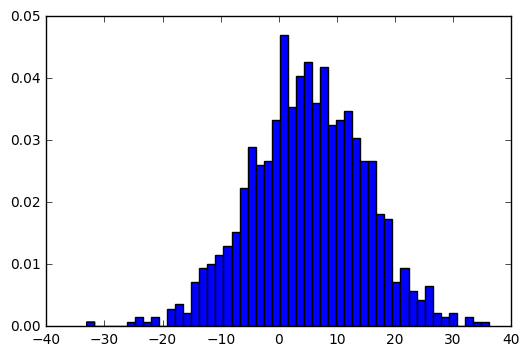

In [3]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [4]:
a = RTBM(1,1)
a.random_init()


In [5]:
minim = minimizer.CMA()
minim.set_costfunction(Logarithmic)

In [6]:
solution = minim.train(a, data, 0)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=795193, Wed Oct 11 14:05:24 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.044297816483947e+04 1.0e+00 9.58e-01  9e-01  1e+00 0:00.1
    2     16 8.083828867349561e+03 1.2e+00 9.70e-01  9e-01  1e+00 0:00.2


../costfunctions.py:6: RuntimeWarning: divide by zero encountered in log
  res = -np.sum(np.log(X))
/opt/SageMath/local/lib/python2.7/site-packages/cma/evolution_strategy.py:3049: ComplexWarning: Casting complex values to real discards the imaginary part
  '%.15e' % (min(self.fit.fit)),
/opt/SageMath/local/lib/python2.7/site-packages/cma/evolution_strategy.py:4336: ComplexWarning: Casting complex values to real discards the imaginary part
  + '\n')


    3     24 2.884595775662504e+04 1.2e+00 8.87e-01  8e-01  9e-01 0:00.3


../rtbm.py:168: RuntimeWarning: overflow encountered in exp
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:168: RuntimeWarning: invalid value encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:171: RuntimeWarning: invalid value encountered in multiply
  return np.sqrt(detT / (2.0 * np.pi) ** (v.shape[0])) * ExpF * R1/R2


   35    280 7.377045829138463e+03 7.4e+00 7.13e-01  3e-01  1e+00 0:03.3
   81    648 4.332634145823631e+03 2.2e+01 2.51e-01  4e-02  5e-01 0:07.4
  100    800 3.712740993647396e+03 3.8e+01 8.00e-02  4e-03  1e-01 0:09.1
  168   1344 3.700550610877571e+03 2.1e+03 9.60e-02  8e-04  4e-01 0:15.2
  200   1600 3.700337207797428e+03 2.9e+03 3.10e-02  1e-04  7e-02 0:18.0
  291   2328 3.700233101314060e+03 1.9e+04 3.50e-02  1e-05  5e-02 0:26.1
  300   2400 3.700233027346457e+03 1.6e+04 3.39e-02  1e-05  3e-02 0:26.9
  400   3200 3.700232799203667e+03 1.3e+04 1.22e-01  5e-06  2e-02 0:35.7
  500   4000 3.700232746111898e+03 2.7e+04 4.16e-01  2e-06  2e-02 0:44.6
  600   4800 3.700232742806823e+03 3.7e+04 3.41e-03  2e-09  2e-05 0:53.4
  617   4936 3.700232742806823e+03 4.1e+04 2.44e-03  8e-10  1e-05 0:54.9
termination on tolfun=1e-11 (Wed Oct 11 14:06:19 2017)
final/bestever f-value = 3.700233e+03 3.700233e+03
incumbent solution: [0.00010852509608819869, 0.011339111510238434, 5.9532932665079761, 0.07

/opt/SageMath/local/lib/python2.7/site-packages/cma/evolution_strategy.py:2728: ComplexWarning: Casting complex values to real discards the imaginary part
  fbestever))


## Testing output

/opt/SageMath/local/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


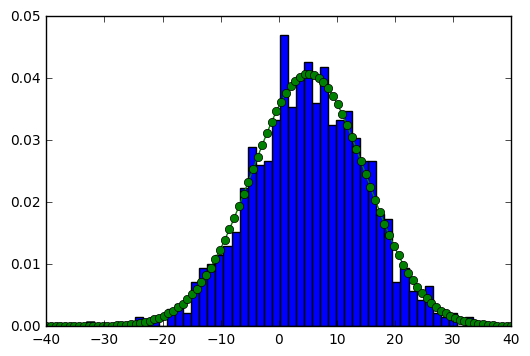

In [7]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

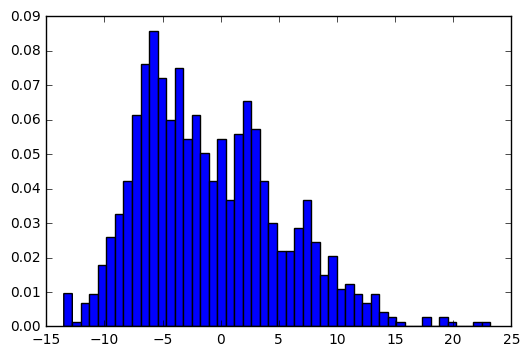

In [8]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [17]:
a = RTBM(1,2)
a.random_init()

In [18]:
minim = minimizer.CMA()
minim.set_costfunction(Logarithmic)

In [19]:
solution = minim.train(a, data, 0)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=880444, Wed Oct 11 14:07:42 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 9.506823960838068e+03 1.0e+00 9.54e-01  9e-01  1e+00 0:00.4
    2     20 1.106839356851669e+04 1.3e+00 8.70e-01  8e-01  9e-01 0:00.8
    3     30 2.318935280891840e+04 1.3e+00 7.79e-01  7e-01  8e-01 0:01.6


/opt/SageMath/local/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in cdouble_scalars
  ret = ret.dtype.type(ret / rcount)


   18    180 7.466060765472964e+03 2.5e+00 1.39e+00  1e+00  2e+00 0:04.7


../rtbm.py:169: RuntimeWarning: overflow encountered in exp
  R2 = RiemannTheta((BhT - BtiTW) / (2.0j * np.pi), (-q + WtiTW) / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:169: RuntimeWarning: invalid value encountered in multiply
  R2 = RiemannTheta((BhT - BtiTW) / (2.0j * np.pi), (-q + WtiTW) / (2.0j * np.pi), prec=RTBM_precision)


   43    430 1.827731260704202e+04 4.6e+00 8.51e-01  5e-01  1e+00 0:08.7
   77    770 3.559938713172390e+03 1.0e+01 5.29e-01  2e-01  8e-01 0:13.8
WARNING (module=cma.utilities.utils, iteration=83):  flat fitness (sigma=4.90e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=83):  flat fitness (sigma=4.90e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=83):  flat fitness (sigma=4.90e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=88):  flat fitness (sigma=3

## Testing output

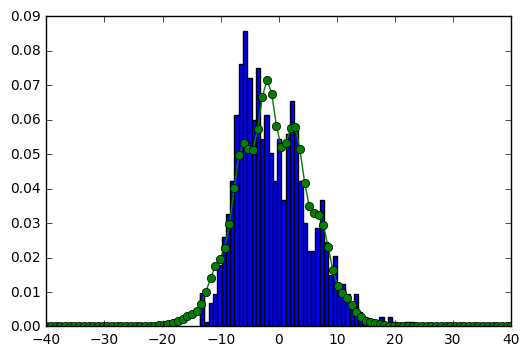

In [20]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')